In [4]:
import pyarrow.parquet as pq;
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

df = pd.read_parquet('querystoredata.gzip')
pd.options.display.max_columns = None

In [3]:
df

,runtime_stats_id,plan_id,runtime_stats_interval_id,execution_type,execution_type_desc,first_execution_time,last_execution_time,count_executions,avg_duration,last_duration,min_duration,max_duration,stdev_duration,avg_cpu_time,last_cpu_time,min_cpu_time,max_cpu_time,stdev_cpu_time,avg_logical_io_reads,last_logical_io_reads,min_logical_io_reads,max_logical_io_reads,stdev_logical_io_reads,avg_logical_io_writes,last_logical_io_writes,min_logical_io_writes,max_logical_io_writes,stdev_logical_io_writes,avg_physical_io_reads,last_physical_io_reads,min_physical_io_reads,max_physical_io_reads,stdev_physical_io_reads,avg_clr_time,last_clr_time,min_clr_time,max_clr_time,stdev_clr_time,avg_dop,last_dop,min_dop,max_dop,stdev_dop,avg_query_max_used_memory,last_query_max_used_memory,min_query_max_used_memory,max_query_max_used_memory,stdev_query_max_used_memory,avg_rowcount,last_rowcount,min_rowcount,max_rowcount,stdev_rowcount,avg_compile_duration,compatibility_level,count_compiles,engine_version,force_failure_count,initial_plan_compile_start_time,is_forced_plan,is_natively_compiled,is_online_index_plan,is_parallel_plan,is_trivial_plan,last_compile_duration,last_compile_start_time,plan_last_execution_time,last_force_failure_reason,last_force_failure_reason_desc,plan_group_id,query_plan,query_plan_hash,start_time,end_time,avg_bind_cpu_time,avg_bind_duration,avg_query_compiles,avg_compile_memory_kb,avg_optimize_cpu_time,avg_optimize_duration,batch_sql_handle,context_settings_id,count_query_compiles,initial_compile_start_time,is_clouddb_internal_query,is_internal_query,last_bind_cpu_time,last_bind_duration,last_compile_batch_offset_end,last_compile_batch_offset_start,last_compile_batch_sql_handle,last_query_compile_duration,last_compile_memory_kb,last_query_compile_start_time,last_query_execution_time,last_optimize_cpu_time,last_optimize_duration,max_compile_memory_kb,object_id,query_parameterization_type,query_parameterization_type_desc,query_sql_text,has_restricted_text,is_part_of_encrypted_module,EndOfLineMarker
0,70,1,2,0,Regular,2018-02-20 10:08:43.4900000 +00:00,2018-02-20 10:08:43.4900000 +00:00,1,955,955,955,955,0,955,955,955,955,0,34,34,34,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,270,270,270,270,0,3,3,3,3,0,27081.846153846152,130,52,13.0.5026.0,0,2018-02-20 09:54:33.5300000 +00:00,False,False,False,False,False,36714,2018-06-15 18:09:29.1930000 +00:00,2018-06-15 18:09:29.2330000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",67946654650BA6C1,2018-02-20 10:00:00.0000000 +00:00,2018-02-20 11:00:00.0000000 +00:00,4147.2641509433961,4891,27913.566037735851,4186.4150943396226,22960.018867924529,23022.566037735851,,1,53,2018-02-20 09:54:33.5300000 +00:00,False,False,17657,24625,316,0,0200000065DD9709FBACB04F8E8FCBA7A7DC36E033D2B0...,71163,4216,2018-11-20 16:53:39.3930000 +00:00,2018-11-20 16:53:39.4700000 +00:00,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
1,130,1,3,0,Regular,2018-02-20 12:01:00.6000000 +00:00,2018-02-20 12:01:00.6000000 +00:00,1,1288,1288,1288,1288,0,1287,1287,1287,1287,0,34,34,34,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,270,270,270,270,0,3,3,3,3,0,27081.846153846152,130,52,13.0.5026.0,0,2018-02-20 09:54:33.5300000 +00:00,False,False,False,False,False,36714,2018-06-15 18:09:29.1930000 +00:00,2018-06-15 18:09:29.2330000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",67946654650BA6C1,2018-02-20 12:00:00.0000000 +00:00,2018-02-20 13:00:00.0000000 +00:00,4147.2641509433961,4891,27913.566037735851,4186.4150943396226,22960.018867924529,23022.566037735851,,1,53,2018-02-20 09:54:33.5300000 +00:00,False,False,17657,24625,316,0,0200000065DD9709FBACB04F8E8FCBA7A7DC36E033D2B0...,71163,4216,2018-11-20 16:53:39.3930000 +00:00,2018-11-20 16:53:39.4700000 +00:00,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
2,131,1,4,0,Regular,2018-02-20 14:56:52.8600000

In [10]:
df.describe()

,avg_duration
count,7.310000e+02
mean,4.675952e+04
std,4.348857e+05
min,1.741667e+01
25%,1.995000e+02
50%,7.660000e+02
75%,6.479000e+03
max,1.115594e+07


In [11]:
len(df['query_plan'][100])

3069

## Extract Queryplan-Lenght in Characters

In [12]:
df['QueryplanSize'] = df.query_plan.str.len()

In [13]:
df['QueryplanSize'].describe()

count       731.000000
mean      38189.865937
std       56856.670178
min        2108.000000
25%        6482.000000
50%       21044.000000
75%       34972.000000
max      449748.000000
Name: QueryplanSize, dtype: float64

In [20]:
df.loc[df['QueryplanSize'] == 449748]

,runtime_stats_id,plan_id,runtime_stats_interval_id,execution_type,execution_type_desc,first_execution_time,last_execution_time,count_executions,avg_duration,last_duration,min_duration,max_duration,stdev_duration,avg_cpu_time,last_cpu_time,min_cpu_time,max_cpu_time,stdev_cpu_time,avg_logical_io_reads,last_logical_io_reads,min_logical_io_reads,max_logical_io_reads,stdev_logical_io_reads,avg_logical_io_writes,last_logical_io_writes,min_logical_io_writes,max_logical_io_writes,stdev_logical_io_writes,avg_physical_io_reads,last_physical_io_reads,min_physical_io_reads,max_physical_io_reads,stdev_physical_io_reads,avg_clr_time,last_clr_time,min_clr_time,max_clr_time,stdev_clr_time,avg_dop,last_dop,min_dop,max_dop,stdev_dop,avg_query_max_used_memory,last_query_max_used_memory,min_query_max_used_memory,max_query_max_used_memory,stdev_query_max_used_memory,avg_rowcount,last_rowcount,min_rowcount,max_rowcount,stdev_rowcount,avg_compile_duration,compatibility_level,count_compiles,engine_version,force_failure_count,initial_plan_compile_start_time,is_forced_plan,is_natively_compiled,is_online_index_plan,is_parallel_plan,is_trivial_plan,last_compile_duration,last_compile_start_time,plan_last_execution_time,last_force_failure_reason,last_force_failure_reason_desc,plan_group_id,query_plan,query_plan_hash,start_time,end_time,avg_bind_cpu_time,avg_bind_duration,avg_query_compiles,avg_compile_memory_kb,avg_optimize_cpu_time,avg_optimize_duration,batch_sql_handle,context_settings_id,count_query_compiles,initial_compile_start_time,is_clouddb_internal_query,is_internal_query,last_bind_cpu_time,last_bind_duration,last_compile_batch_offset_end,last_compile_batch_offset_start,last_compile_batch_sql_handle,last_query_compile_duration,last_compile_memory_kb,last_query_compile_start_time,last_query_execution_time,last_optimize_cpu_time,last_optimize_duration,max_compile_memory_kb,object_id,query_parameterization_type,query_parameterization_type_desc,query_sql_text,has_restricted_text,is_part_of_encrypted_module,EndOfLineMarker,QueryplanSize
504,210,143,19,0,Regular,2018-03-19 12:48:17.3730000 +00:00,2018-03-19 12:48:17.3730000 +00:00,1,12096.0,12096,12096,12096,0,6768,6768,6768,6768,0,699,699,699,699,0,0,0,0,0,0,64,64,64,64,0,0,0,0,0,0,1,1,1,1,0,680,680,680,680,0,1,1,1,1,0,204977.5,130,2,13.0.4206.0,0,2018-03-19 12:48:17.1370000 +00:00,False,False,False,False,False,196054,2018-03-20 10:48:51.3170000 +00:00,2018-03-20 10:48:51.5230000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",15C21686FDE97861,2018-03-19 12:00:00.0000000 +00:00,2018-03-19 13:00:00.0000000 +00:00,10912,10912,204977.5,26752,193781,194065.5,02000000CEB64E15C86E49D27652EF253350A9744B5F8B...,1,2,2018-03-19 12:48:17.1370000 +00:00,False,False,10032,10032,18758,4256,02000000CEB64E15C86E49D27652EF253350A9744B5F8B...,196054,26752,2018-03-20 10:48:51.3170000 +00:00,2018-03-20 10:48:51.5230000 +00:00,186020,186022,26752,0,1,User,"(@_msparam_0 nvarchar(4000),@_msparam_1 nvarch...",False,False,QueryStoreEndofLineMarker,449748
505,265,143,23,0,Regular,2018-03-20 10:48:51.5230000 +00:00,2018-03-20 10:48:51.5230000 +00:00,1,6940.0,6940,6940,6940,0,5720,5720,5720,5720,0,287,287,287,287,0,0,0,0,0,0,24,24,24,24,0,0,0,0,0,0,1,1,1,1,0,680,680,680,680,0,1,1,1,1,0,204977.5,130,2,13.0.4206.0,0,2018-03-19 12:48:17.1370000 +00:00,False,False,False,False,False,196054,2018-03-20 10:48:51.3170000 +00:00,2018-03-20 10:48:51.5230000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",15C21686FDE97861,2018-03-20 10:00:00.0000000 +00:00,2018-03-20 11:00:00.0000000 +00:00,10912,10912,204977.5,26752,193781,194065.5,02000000CEB64E15C86E49D27652EF253350A9744B5F8B...,1,2,2018-03-19 12:48:17.1370000 +00:00,False,False,10032,10032,18758,4256,02000000CEB64E15C86E49D27652EF253350A9744B5F8B...,196054,26752,2018-03-20 10:48:51.3170000 +00:00,2018-03-20 10:48:51.5230000 +00:00,186020,186022,26752,0,1,User,"(@_msparam_0 nvarchar(4000),@_msparam_1 nvarch...",False,False,QueryStoreEndofLineMark

In [11]:
df[['avg_optimize_duration']] = df[['avg_optimize_duration']].apply(pd.to_numeric)
df[['avg_duration']] = df[['avg_duration']].apply(pd.to_numeric)
df[['count_executions']] = df[['count_executions']].apply(pd.to_numeric)
df[['start_time']] = df[['start_time']].apply(pd.to_datetime)

## Extract StatementEstRows

In [ ]:
import xml.etree.ElementTree as ET
def get_StatementEstRows_from_xml(raw): 
    #print(len(raw))
    estimate = -1.0
    root = ET.fromstring(raw)
    try:
         estimate = root[0][0][0][0].get('StatementEstRows')
    except:
        print ("Oops! Plan does not have the rel Element")
        pass
    return estimate
  
    # some etree xml mangling
get_StatementEstRows_from_xml(df['query_plan'][0])

In [87]:
df['StatementEstRows'] = df['query_plan'].apply(get_StatementEstRows_from_xml)

Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does 

In [13]:
df[['StatementEstRows']] = df[['StatementEstRows']].apply(pd.to_numeric)
df['StatementEstRows'].describe()

KeyError: "['StatementEstRows'] not in index"

### Extract Estimated Subtree Cost 

In [96]:
import xml.etree.ElementTree as ET
def get_EstimatedSubtreeCost_from_xml(raw): 
    #print(len(raw))
    root = ET.fromstring(raw)
    #print (root[0][0][0][0][1][3].get('EstimatedTotalSubtreeCost'))
    estimate = -1.0
    try:
        estimate = root[0][0][0][0][1][3].get('EstimatedTotalSubtreeCost')
    except:
        print ("Oops! Plan does not have the rel Element")
        pass
    return estimate
  
    # some etree xml mangling
get_EstimatedSubtreeCost_from_xml(df['query_plan'][2])

Oops! Plan does not have the rel Element


-1.0

In [97]:
#import data from XML Plan

df['EstimatedTotalSubtreeCost'] = df['query_plan'].apply(get_EstimatedSubtreeCost_from_xml)


Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does 

Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does not have the rel Element
Oops! Plan does 

In [107]:
df[['EstimatedTotalSubtreeCost']] = df[['EstimatedTotalSubtreeCost']].apply(pd.to_numeric)
df['EstimatedTotalSubtreeCost'].describe()

count    571.000000
mean      -0.564552
std        0.812782
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        0.009929
max        3.400770
Name: EstimatedTotalSubtreeCost, dtype: float64

In [99]:
## Extract has Warning 

In [100]:
df.loc[505].query_plan

'<ShowPlanXML xmlns="http://schemas.microsoft.com/sqlserver/2004/07/showplan" Version="1.5" Build="13.0.4206.0"><BatchSequence><Batch><Statements><StmtSimple StatementText="SELECT&#xa;tbl.name AS [Name],&#xa;tbl.object_id AS [ID],&#xa;tbl.create_date AS [CreateDate],&#xa;tbl.modify_date AS [DateLastModified],&#xa;ISNULL(stbl.name, N&apos;&apos;) AS [Owner],&#xa;CAST(case when tbl.principal_id is null then 1 else 0 end AS bit) AS [IsSchemaOwned],&#xa;SCHEMA_NAME(tbl.schema_id) AS [Schema],&#xa;CAST(&#xd;&#xa; case &#xd;&#xa;    when tbl.is_ms_shipped = 1 then 1&#xd;&#xa;    when (&#xd;&#xa;        select &#xd;&#xa;            major_id &#xd;&#xa;        from &#xd;&#xa;            sys.extended_properties &#xd;&#xa;        where &#xd;&#xa;            major_id = tbl.object_id and &#xd;&#xa;            minor_id = 0 and &#xd;&#xa;            class = 1 and &#xd;&#xa;            name = N&apos;microsoft_database_tools_support&apos;) &#xd;&#xa;        is not null then 1&#xd;&#xa;    else 0&#xd;&#

## Extract Warnings

In [6]:
import xml.etree.ElementTree as ET
def get_Warning_from_xml(raw): 
    #print(len(raw))
    root = ET.fromstring(raw)
    warning = 0
    try:
        if (root[0][0][0][0][1][0].tag == '{http://schemas.microsoft.com/sqlserver/2004/07/showplan}Warnings'):
            warning = 1
    except:
        print ("Oops! Plan does not have the rel Element")
        pass
    return warning
get_Warning_from_xml(df.loc[200].query_plan)


0

In [7]:

df['warning'] = df['query_plan'].apply(get_Warning_from_xml)

In [103]:
df.loc[505].query_plan

'<ShowPlanXML xmlns="http://schemas.microsoft.com/sqlserver/2004/07/showplan" Version="1.5" Build="13.0.4206.0"><BatchSequence><Batch><Statements><StmtSimple StatementText="SELECT&#xa;tbl.name AS [Name],&#xa;tbl.object_id AS [ID],&#xa;tbl.create_date AS [CreateDate],&#xa;tbl.modify_date AS [DateLastModified],&#xa;ISNULL(stbl.name, N&apos;&apos;) AS [Owner],&#xa;CAST(case when tbl.principal_id is null then 1 else 0 end AS bit) AS [IsSchemaOwned],&#xa;SCHEMA_NAME(tbl.schema_id) AS [Schema],&#xa;CAST(&#xd;&#xa; case &#xd;&#xa;    when tbl.is_ms_shipped = 1 then 1&#xd;&#xa;    when (&#xd;&#xa;        select &#xd;&#xa;            major_id &#xd;&#xa;        from &#xd;&#xa;            sys.extended_properties &#xd;&#xa;        where &#xd;&#xa;            major_id = tbl.object_id and &#xd;&#xa;            minor_id = 0 and &#xd;&#xa;            class = 1 and &#xd;&#xa;            name = N&apos;microsoft_database_tools_support&apos;) &#xd;&#xa;        is not null then 1&#xd;&#xa;    else 0&#xd;&#

In [104]:
root = ET.fromstring(df.loc[505].query_plan)
root[0][0][0][0][1][0].tag

'{http://schemas.microsoft.com/sqlserver/2004/07/showplan}Warnings'

## Export featurized Data

In [109]:
df['EstimatedTotalSubtreeCost'].describe()

count    571.000000
mean      -0.564552
std        0.812782
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        0.009929
max        3.400770
Name: EstimatedTotalSubtreeCost, dtype: float64

In [110]:
df

,runtime_stats_id,plan_id,runtime_stats_interval_id,execution_type,execution_type_desc,first_execution_time,last_execution_time,count_executions,avg_duration,last_duration,min_duration,max_duration,stdev_duration,avg_cpu_time,last_cpu_time,min_cpu_time,max_cpu_time,stdev_cpu_time,avg_logical_io_reads,last_logical_io_reads,min_logical_io_reads,max_logical_io_reads,stdev_logical_io_reads,avg_logical_io_writes,last_logical_io_writes,min_logical_io_writes,max_logical_io_writes,stdev_logical_io_writes,avg_physical_io_reads,last_physical_io_reads,min_physical_io_reads,max_physical_io_reads,stdev_physical_io_reads,avg_clr_time,last_clr_time,min_clr_time,max_clr_time,stdev_clr_time,avg_dop,last_dop,min_dop,max_dop,stdev_dop,avg_query_max_used_memory,last_query_max_used_memory,min_query_max_used_memory,max_query_max_used_memory,stdev_query_max_used_memory,avg_rowcount,last_rowcount,min_rowcount,max_rowcount,stdev_rowcount,avg_compile_duration,compatibility_level,count_compiles,engine_version,force_failure_count,initial_plan_compile_start_time,is_forced_plan,is_natively_compiled,is_online_index_plan,is_parallel_plan,is_trivial_plan,last_compile_duration,last_compile_start_time,plan_last_execution_time,last_force_failure_reason,last_force_failure_reason_desc,plan_group_id,query_plan,query_plan_hash,start_time,end_time,avg_bind_cpu_time,avg_bind_duration,avg_query_compiles,avg_compile_memory_kb,avg_optimize_cpu_time,avg_optimize_duration,batch_sql_handle,context_settings_id,count_query_compiles,initial_compile_start_time,is_clouddb_internal_query,is_internal_query,last_bind_cpu_time,last_bind_duration,last_compile_batch_offset_end,last_compile_batch_offset_start,last_compile_batch_sql_handle,last_query_compile_duration,last_compile_memory_kb,last_query_compile_start_time,last_query_execution_time,last_optimize_cpu_time,last_optimize_duration,max_compile_memory_kb,object_id,query_parameterization_type,query_parameterization_type_desc,query_sql_text,has_restricted_text,is_part_of_encrypted_module,EndOfLineMarker,QueryplanSize,warning,EstimatedTotalSubtreeCost
0,70,1,2,0,Regular,2018-02-20 10:08:43.4900000 +00:00,2018-02-20 10:08:43.4900000 +00:00,1,955.000000,955,955,955,0,955,955,955,955,0,34,34,34,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,270,270,270,270,0,3,3,3,3,0,27081.846153846152,130,52,13.0.5026.0,0,2018-02-20 09:54:33.5300000 +00:00,False,False,False,False,False,36714,2018-06-15 18:09:29.1930000 +00:00,2018-06-15 18:09:29.2330000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",67946654650BA6C1,2018-02-20 10:00:00.0000000 +00:00,2018-02-20 11:00:00.0000000 +00:00,4147.2641509433961,4891,27913.566037735851,4186.4150943396226,22960.018867924529,23022.566037735851,,1,53,2018-02-20 09:54:33.5300000 +00:00,False,False,17657,24625,316,0,0200000065DD9709FBACB04F8E8FCBA7A7DC36E033D2B0...,71163,4216,2018-11-20 16:53:39.3930000 +00:00,2018-11-20 16:53:39.4700000 +00:00,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker,34972,0,-1.000000
1,130,1,3,0,Regular,2018-02-20 12:01:00.6000000 +00:00,2018-02-20 12:01:00.6000000 +00:00,1,1288.000000,1288,1288,1288,0,1287,1287,1287,1287,0,34,34,34,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,270,270,270,270,0,3,3,3,3,0,27081.846153846152,130,52,13.0.5026.0,0,2018-02-20 09:54:33.5300000 +00:00,False,False,False,False,False,36714,2018-06-15 18:09:29.1930000 +00:00,2018-06-15 18:09:29.2330000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",67946654650BA6C1,2018-02-20 12:00:00.0000000 +00:00,2018-02-20 13:00:00.0000000 +00:00,4147.2641509433961,4891,27913.566037735851,4186.4150943396226,22960.018867924529,23022.566037735851,,1,53,2018-02-20 09:54:33.5300000 +00:00,False,False,17657,24625,316,0,0200000065DD9709FBACB04F8E8FCBA7A7DC36E033D2B0...,71163,4216,2018-11-20 16:53:39.3930000 +00:00,2018-11-20 16:53:39.4700000 +00:00,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False

In [111]:
df.to_parquet('querystore-featurized.gzip', compression='gzip')
df.to_csv('powerbioutput2.csv', sep='\t', encoding='utf-8')

In [18]:
plt.rcParams['figure.figsize']= (15,6)
import matplotlib
matplotlib.style.use('ggplot')

## Group by Hourly Intervals and plot execution Count and (sum of) AVG_duration

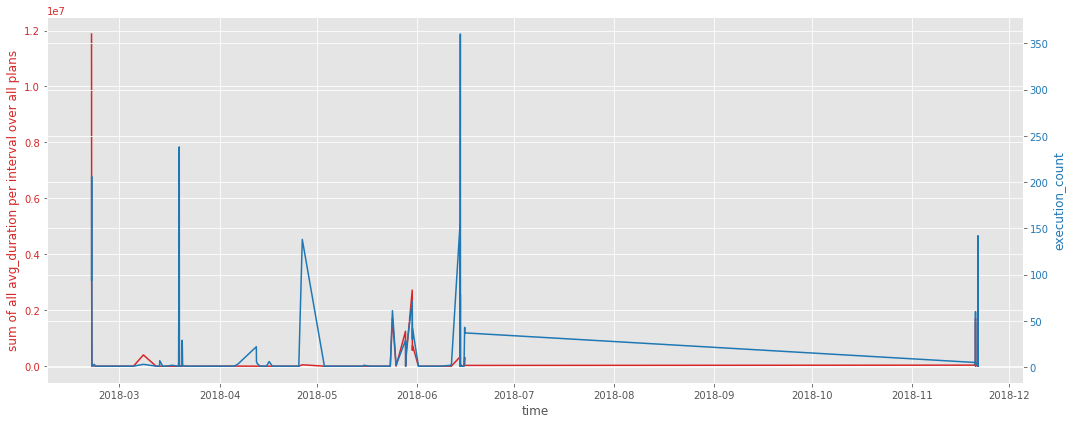

In [19]:
dftime=df.groupby(df.start_time)['count_executions','avg_duration'].agg('sum').reset_index()



dftime['hour'] = dftime.start_time.dt.hour
dftime['day'] = dftime.start_time.dt.day
dftime['month'] = dftime.start_time.dt.month
dftime['year'] = dftime.start_time.dt.year
dftime['date'] = dftime.start_time.dt.date

avgdurationdf = df.groupby(['start_time'])['avg_duration'].mean().reset_index()
#avgdurationdf
dftime['avg_duration_avg'] = avgdurationdf['avg_duration']


dftime.set_index('start_time')

#plt.plot(dftime.start_time,dftime.avg_duration)
#plt.plot(dftime.start_time,dftime.count_executions)


fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('sum of all avg_duration per interval over all plans', color=color)
ax1.plot(dftime.start_time,dftime.avg_duration, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:blue'
ax2.set_ylabel('execution_count', color=color)  # we already handled the x-label with ax1
ax2.plot(dftime.start_time,dftime.count_executions, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


##### Achtung daraus kann nicht abgeleitet werden, dass die Performance über die Zeit schlechter wird. Es handelt sich beim Chart um die Summe der Durchschnitte! Es könnte einfach heißen das über die Zeit mehr Pläne gecached wurden! Man erkennt jedoch das am 13.7. ein Ausfall aufgetreten ist. Dieser Zeitraum sollte weiter untersucht werden. Welche Query ist am 13.7 passiert die ansonsten nicht passiert ist? Eventuell die Memory Estimates aus den Execution Plänen extrahieren und prüfen! 

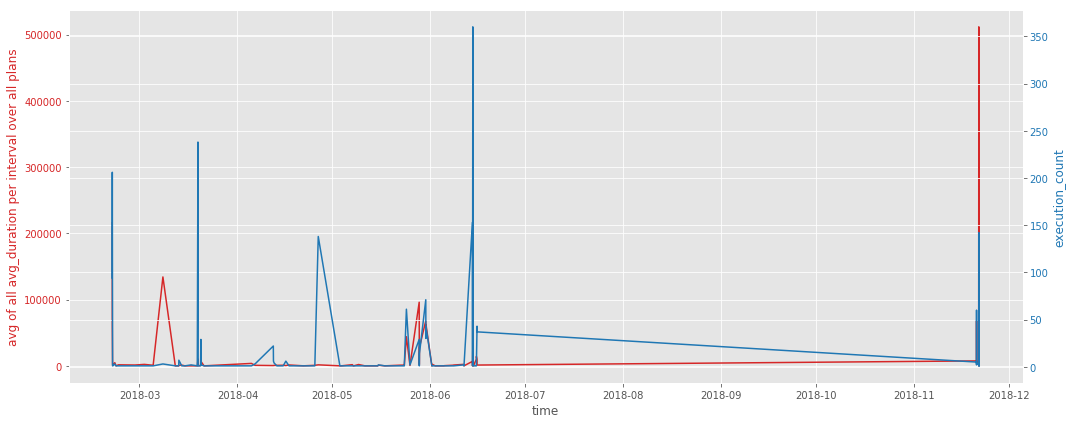

In [20]:

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('avg of all avg_duration per interval over all plans', color=color)
ax1.plot(dftime.start_time,dftime.avg_duration_avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:blue'
ax2.set_ylabel('execution_count', color=color)  # we already handled the x-label with ax1
ax2.plot(dftime.start_time,dftime.count_executions, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [21]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBD5386FD0>,
      dtype=object)

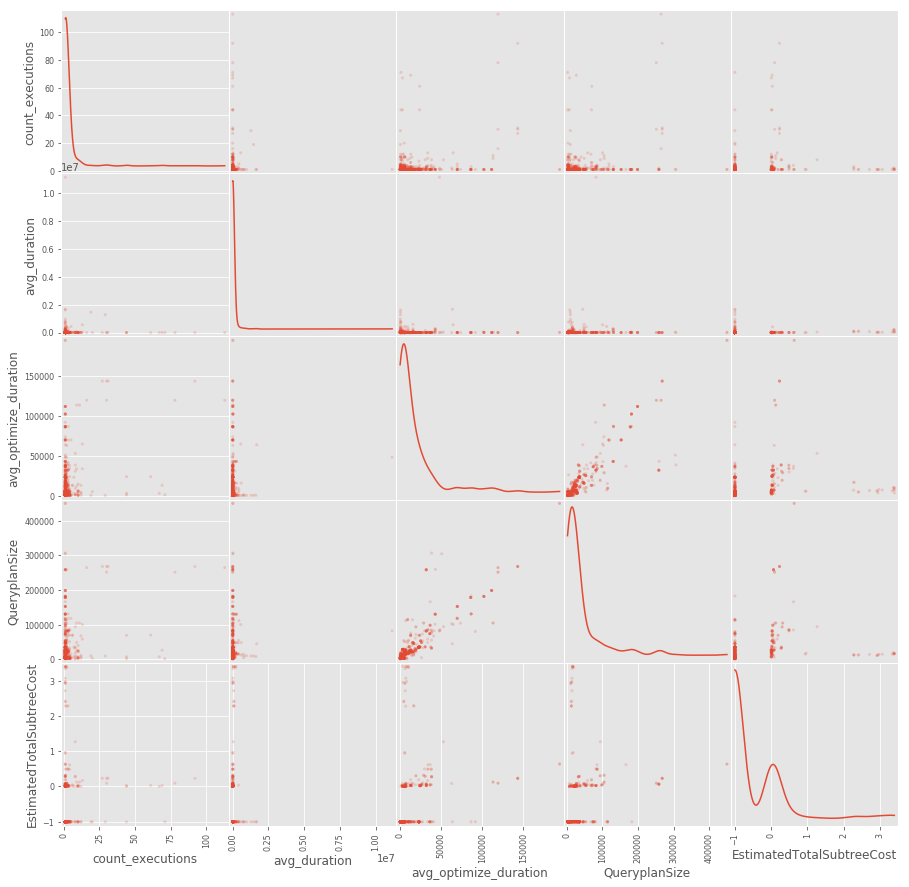

In [22]:
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')